# Final Project - Loans Dataset

Welcome to the final step on the Exploratory Data Analysis (EDA) module. Congratulations! This is the final project!


## Instructions

The objective of this project is to explore and solve problems on a Loans Dataset (`final_project_lending.csv`). This dataset contains information about credit applicants. Banks use this kind of datasets to create models to help on deciding on who to accept/refuse for a loan. Generally, after cleaning and organizing the dataset, the patterns of a good / bad applicant are learned by machine learning models.

Explore, test, evaluate, think, be skeptic! This is Data Science!


## Details on the dataset

The Target (Label) name is `bad_loan`, where $1$ means the observation is a default (person that ended up not paying the loan), and $0$ means the observation is a non-default (person that ended up paying the loan).

All the other features are characteristics of the applicant. 


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Exploratory Data Analysis module at Rumos, **before the FINAL DATE (27-02-2022)** agreed with the professor. Please add your name and e-mail next.

**Student Name**: **** 

**E-mail**: ****@****.com


## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.


---
*Instructor: [*****](https://www.linkedin.com/in/*****/)  
Contact: ****@****.com*

In [3]:
# NOTE: You can import any library you might find useful besides the following ones
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

import matplotlib.pyplot as plt

In [4]:
# RUN this cell: load the dataset (do NOT delete this cell)
data = pd.read_csv('final_project_lending.csv', low_memory=False)

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

1. Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class!

   2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
   2.2. Create a **bar plot**, out of your dataset, that you think is relevant.  
   2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
   2.4. Create a **distribution plot**, with a feature vs target. Don't forget to add some alpha.  
   2.5. (Optional, but incentivized) Create an additional **insightful plot**. Please explain what relevant insight(s) you get from that plot.  

3. Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`.

4. Correlation.

   4.1. What are the two most correlated numerical features (Spearman) - absolute number?   
   4.2. What is the numerical feature most correlated with the target (Pearson)?  

5. Are there any **outliers**? If there are, solved them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

6. Deal with the **missing values**, along with anomalies. Detect and transform or eliminate them. Remember: not all missing values are represented by a `np.nan`.

7. **Feature Selection**.

   7.1. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical)

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

   8.1. Create a pipeline with three steps: 1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; 2) One Scaler you may know; 3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
   8.2. Fit and Transform your dataset.  
   8.3. Comment what you obtained.  

9. Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.


## Evaluation
Points (of a total of 100%):
1. 5%  
2. 25%  
3. 10%  
4. 10%  
5. 10%  
6. 10%  
7. 10%  
8. 10% 
9. 5%

Final 5% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. skeptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

# EXERCISE 1

# 1. 
Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

In [5]:
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [6]:
data.shape

(20000, 15)

In [7]:
data.dtypes

id                         int64
grade                     object
annual_inc               float64
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
bad_loan                   int64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,7.590662e+06,1.609593e+06,586040.000000,6.206283e+06,7.378896e+06,8.766235e+06,1.145464e+07
annual_inc,20000.0,7.334958e+04,4.519857e+04,8412.000000,4.700000e+04,6.500000e+04,8.800000e+04,1.000000e+06
short_emp,20000.0,1.125000e-01,3.159885e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
emp_length_num,20000.0,6.821400e+00,3.774230e+00,0.000000,3.000000e+00,7.000000e+00,1.100000e+01,1.100000e+01
dti,19846.0,1.658784e+01,7.585812e+00,0.000000,1.085250e+01,1.619000e+01,2.206000e+01,3.499000e+01
last_delinq_none,20000.0,5.466000e-01,4.978361e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
last_major_derog_none,574.0,7.595819e-01,4.277101e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
revol_util,20000.0,5.595815e+01,4.211746e+01,0.000000,3.880000e+01,5.710000e+01,7.390000e+01,5.010000e+03
total_rec_late_fee,20000.0,2.906216e-01,3.108654e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.646660e+01
od_ratio,20000.0,5.044303e-01,2.877202e-01,0.000077,2.573556e-01,5.066806e-01,7.537709e-01,9.998937e-01


In [9]:
data.isnull().sum()/len(data)*100

id                        0.000
grade                     0.000
annual_inc                0.000
short_emp                 0.000
emp_length_num            0.000
home_ownership            7.455
dti                       0.770
purpose                   0.000
term                      0.000
last_delinq_none          0.000
last_major_derog_none    97.130
revol_util                0.000
total_rec_late_fee        0.000
od_ratio                  0.000
bad_loan                  0.000
dtype: float64

In [10]:
list = ['grade', 'home_ownership', 'purpose', 'term']

for i in list:
    print(i, '\n',data[i].value_counts()/len(data)*100, '\n')

grade 
 B    30.210
C    27.830
D    17.770
A    10.795
E     8.225
F     4.325
G     0.845
Name: grade, dtype: float64 

home_ownership 
 MORTGAGE    49.220
RENT        35.260
OWN          8.065
Name: home_ownership, dtype: float64 

purpose 
 debt_consolidation    61.685
credit_card           20.685
home_improvement       5.480
other                  5.105
major_purchase         1.895
small_business         1.325
medical                0.875
car                    0.840
moving                 0.615
vacation               0.560
house                  0.505
wedding                0.430
Name: purpose, dtype: float64 

term 
  36 months    74.845
 60 months    24.995
 36 Months     0.160
Name: term, dtype: float64 



In [11]:
data['bad_loan'].value_counts()/len(data)*100

0    80.0
1    20.0
Name: bad_loan, dtype: float64

### Answer:

The dataset has 2000 observations and 15 features, four categoric and the remaining numeric. Three features display missing values with 'last_major_derog_none' missing more than 97% of the observations. The target feature, bad_loan is a numeric binary feature with 80% observation being non-defaull and 20% observation defaulting on their loan, therefore we are facing an unbalanced dataset and a classification problem.

In addition, there seems to be a misslabel problem in the 'term' feature with the 36 Months instead of 36 months.

# EXERCISE 2

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class!

   2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
   2.2. Create a **bar plot**, out of your dataset, that you think is relevant.  
   2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
   2.4. Create a **distribution plot**, with a feature vs target. Don't forget to add some alpha.  
   2.5. (Optional, but incentivized) Create an additional **insightful plot**. Please explain what relevant insight(s) you get from that plot.  


 # 2.1. 
 Pick two numerical variables. Create a **scatter plot**. Describe what you see.

In [12]:
targets = {
    0: 'non-default',
    1: 'default',
}

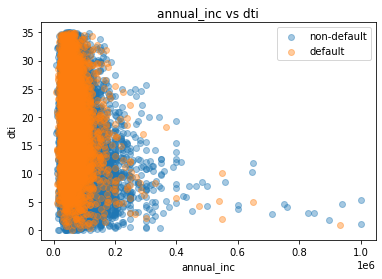

In [13]:
for target in data['bad_loan'].unique():
    mask = data['bad_loan'] == target
    plt.scatter(
        data[mask]['annual_inc'],
        data[mask]['dti'],
        label = targets[target],
        alpha =0.4
    )
    
plt.xlabel('annual_inc')
plt.ylabel('dti')
plt.title('annual_inc vs dti')
#plt.grid()
plt.legend()
plt.show()

# Answer

Scatter plot of 'dti' (debt to income ratio) to 'annual_inc'. We can see that the majority of the bank clients ear less than 200K and so the majority of defaults occur when annual_inc is less than 200K. Some tendency can be observed when the clients earn more then 400K their dti seem to be less than 15.

# 2.2. 

Create a **bar plot**, out of your dataset, that you think is relevant.

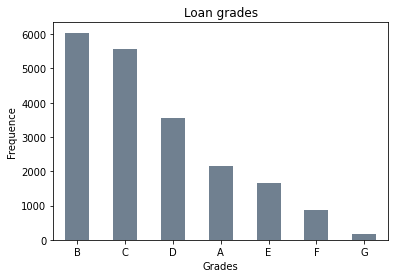

In [14]:
data['grade'].value_counts().plot(kind="bar", title='grade', rot = 0, color = 'slategray')

plt.title('Loan grades')
plt.xlabel('Grades')
plt.ylabel('Frequence')
plt.show()

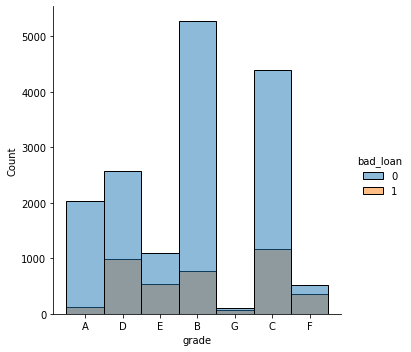

In [15]:
sns.displot(data, x = 'grade', hue = 'bad_loan');

In [19]:
data.groupby(['grade'])['bad_loan'].value_counts()

grade  bad_loan
A      0           2035
       1            124
B      0           5275
       1            767
C      0           4394
       1           1172
D      0           2575
       1            979
E      0           1103
       1            542
F      0            514
       1            351
G      0            104
       1             65
Name: bad_loan, dtype: int64

# Answer:

Most loans are attributed grade B or C, both with more than 5000 observation, while the least attributed grade are F and G. Its seems that loans grade F and G seem to deafult in half the loans granted in these grades.

# 2.3. 
Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)? 

In [20]:
corr = data.corr()
#corr

In [21]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#mask

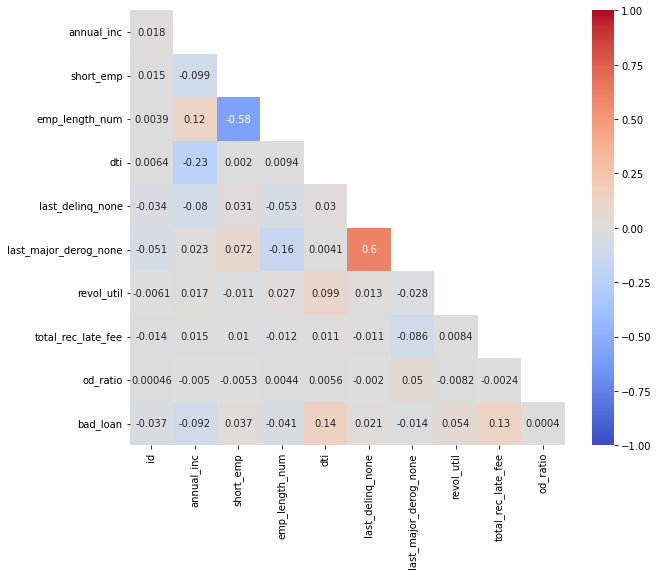

In [22]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr.iloc[1:, :-1],
    mask=mask[1:, :-1],
    vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True
);

# Answer 

It seems that the features 'last_delinq_nome' and 'last_major_derog_none' seem, to have a high positive correlated with 0.6 correlation while 'emp_lenght_num' and 'short_emp' seem to be negative correlated. However 'last_major_derog_none' gave 97% of missing data, so we must be carefull with this result. The features more correlated to the target feature are 'dti' and 'total_rec_late_fee' with 0.14 and 0.13 respectively.

# 2.4. 
Create a **distribution plot**, with a feature vs target. Don't forget to add some alpha.

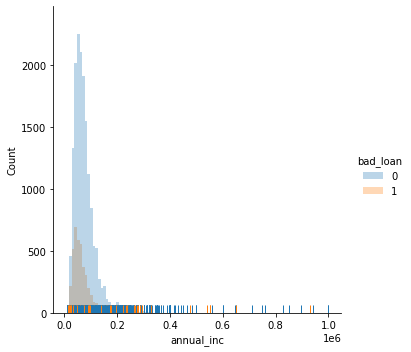

In [23]:
sns.displot(data=data, x="annual_inc", bins=100, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)

# Answer

The distribuiton plot of 'annual_inc' shows that the observations are concentrated below the 200k mark. There are however several values above the 200k mark with default and non-default observation. Above the 400K mark most observations are non-default although few default observation are observed.

# 2.5. 
(Optional, but incentivized) Create an additional **insightful plot**. Please explain what relevant insight(s) you get from that plot.

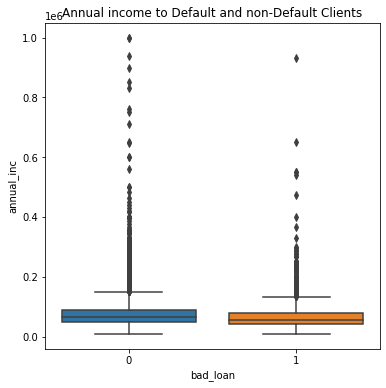

In [28]:
plt.figure(figsize=(6, 6))

sns.boxplot(x='bad_loan', y="annual_inc", data=data)


plt.title('Annual income to Default and non-Default Clients')
plt.show()

# Answer 

Non-default clients have a higher median annual income and more potential outliers with more clients with a higher annual income. On the other side, default clients display a lower median annual income and some potential outliers, which, while still displaying a higher annual income, still defaults on their loans.

# EXERCISE 3

 Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`.

* 'id'

In [29]:
data['id'].describe().astype(int)

count       20000
mean      7590662
std       1609593
min        586040
25%       6206282
50%       7378896
75%       8766234
max      11454641
Name: id, dtype: int64

In [30]:
stats.skew(data['id'])

0.3349299221454227

In [31]:
stats.kurtosis(data['id'])

-0.35951771246049

In [32]:
data['id'].isnull().sum()

0

However, id is a loan unique identifier and therefore this attribute might not be relevant

* 'annual_inc'

In [33]:
data['annual_inc'].describe().astype(int)

count      20000
mean       73349
std        45198
min         8412
25%        47000
50%        65000
75%        88000
max      1000000
Name: annual_inc, dtype: int64

In [34]:
stats.skew(data['annual_inc'])

5.275648123592321

In [35]:
stats.kurtosis(data['annual_inc'])

66.72665803201564

In [36]:
data['annual_inc'].isnull().sum()

0

* 'grade

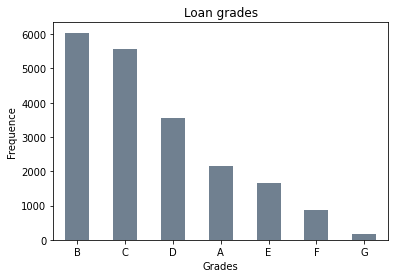

In [37]:
data['grade'].value_counts().plot.bar(color='slategray', rot=0)

plt.title('Loan grades')
plt.xlabel('Grades')
plt.ylabel('Frequence')
plt.show()

In [38]:
counts = data['grade'].value_counts()
moda = data['grade'].mode().iloc[0]

print('For the attribute grade:')
print('\n')
print('Number of unique values:', len(counts))
print('Unique values:', ', '.join(counts.index))
print('Top 3 unique values:', ', '.join(counts[:3].index))
print('\n')
print(counts)
print('\n')
print(F'The mode of the grade attribute is: {moda}')

For the attribute grade:


Number of unique values: 7
Unique values: B, C, D, A, E, F, G
Top 3 unique values: B, C, D


B    6042
C    5566
D    3554
A    2159
E    1645
F     865
G     169
Name: grade, dtype: int64


The mode of the grade attribute is: B


# EXERCISE 4

4.1. What are the two most correlated numerical features (Spearman) - absolute number?   
4.2. What is the numerical feature most correlated with the target (Pearson)?  

In [39]:
data_numeric = data.filter(['annual_inc',
                           'emp_length_num',
                           'dti',
                           'revol_util',
                           'total_rec_late_fee',
                           'od_ratio',
                           'bad_loan'], axis = 1)

# 4.1.

What are the two most correlated numerical features (Spearman) - absolute number? 

In [43]:
data_numeric_corr_spearman = data_numeric.corr(method='spearman')

In [44]:
mask = np.zeros_like(data_numeric_corr_spearman)
mask[np.triu_indices_from(mask)] = True

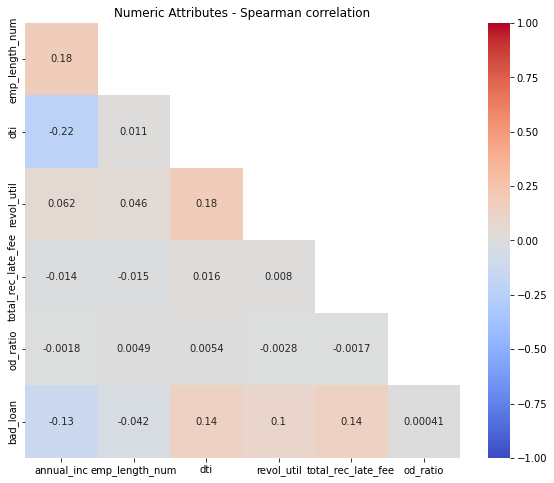

In [45]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data_numeric_corr_spearman.iloc[1:, :-1],
    mask=mask[1:, :-1],
    vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True
);

plt.title('Numeric Attributes - Spearman correlation')
plt.show()

# Answer

The two most correlated features are 'dti' and 'annual_inc' with a negative correlation of -0.22

# 4.2. 

What is the numerical feature most correlated with the target (Pearson)?

In [46]:
data_numeric_corr_pearson = data_numeric.corr(method='pearson')

In [47]:
mask = np.zeros_like(data_numeric_corr_pearson)
mask[np.triu_indices_from(mask)] = True

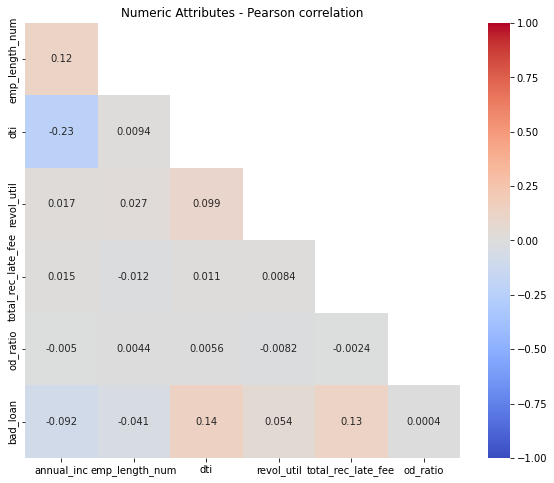

In [48]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    data_numeric_corr_pearson.iloc[1:, :-1],
    mask=mask[1:, :-1],
    vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True
);

plt.title('Numeric Attributes - Pearson correlation')
plt.show()

# Answer 
The attribute more correlated to the target 'bad_loan' is 'dti' with a correlation of 0.14

# EXERCISE 5

# 5. 
Are there any **outliers**? If there are, solved them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

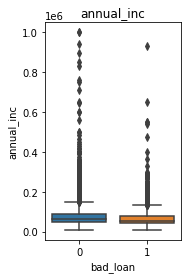

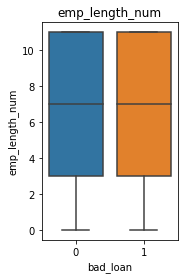

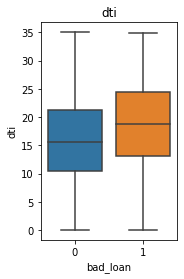

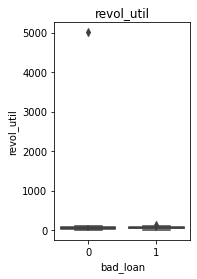

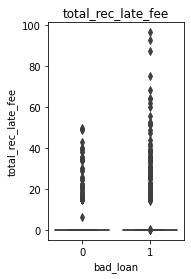

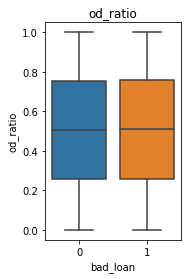

In [49]:
# lets look at some boxplots

i = 1
for col in data_numeric:
    if col != 'bad_loan':
        fig = plt.figure(figsize=(20, 4))
        fig.add_subplot(1, data_numeric.shape[1], i)
        sns.boxplot(x='bad_loan', y=col, data=data_numeric)

        plt.title(col)
        plt.show()
    i=i+1

Through the observation of the boxplot we can see that the features potentialy containing outliers are 'annual_inc', 'revol_util' and 'total_rec_late_fee'. So we need to investigate a bit further using histograms to observe the destribution of the observation in these features

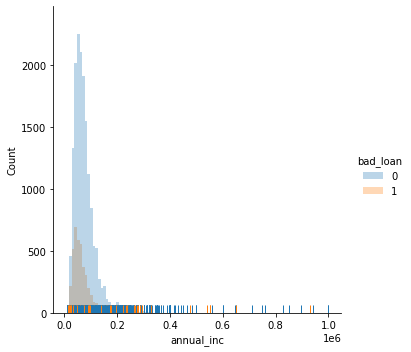

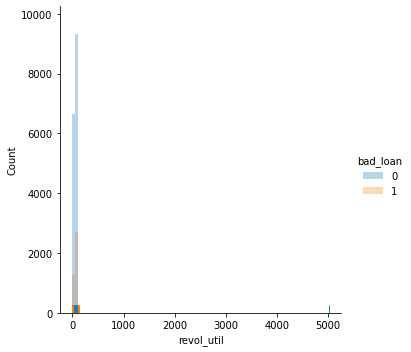

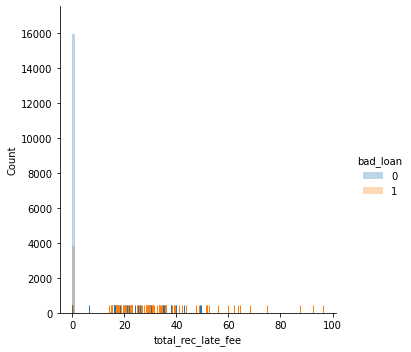

In [50]:
sns.displot(data=data, x="annual_inc", bins=100, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
sns.displot(data=data, x="revol_util", bins=100, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
sns.displot(data=data, x="total_rec_late_fee", bins=100, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)

plt.show()

We're gonna recrut the help of a function to assist in detecting outliers based on the number of standart deviation above of under the mean

In [51]:
def potential_outliers(x, n_std):
    mean = x.mean()
    std = x.std()

    upper_bound = mean + n_std * std
    lower_bound = mean - n_std * std

    n_outliers = sum(x < lower_bound) + sum(x > upper_bound)
    
    print(f"Outliers beyond {n_std}std of mean:", n_outliers)
    print(f"lower_bound={lower_bound:2.1f}; upper_bound={upper_bound:2.1f}")
    return n_outliers

print('### annual_inc ###')
potential_outliers(data['annual_inc'], 2)
print()
potential_outliers(data['annual_inc'], 3)
print()

print('### revol_util ###')
potential_outliers(data['revol_util'], 2)
print()
potential_outliers(data['revol_util'], 3)
print()

print('### total_rec_late_fee ###')
potential_outliers(data['total_rec_late_fee'], 2)
print()
potential_outliers(data['total_rec_late_fee'], 3)
print()

### annual_inc ###
Outliers beyond 2std of mean: 615
lower_bound=-17047.6; upper_bound=163746.7

Outliers beyond 3std of mean: 259
lower_bound=-62246.1; upper_bound=208945.3

### revol_util ###
Outliers beyond 2std of mean: 1
lower_bound=-28.3; upper_bound=140.2

Outliers beyond 3std of mean: 1
lower_bound=-70.4; upper_bound=182.3

### total_rec_late_fee ###
Outliers beyond 2std of mean: 227
lower_bound=-5.9; upper_bound=6.5

Outliers beyond 3std of mean: 227
lower_bound=-9.0; upper_bound=9.6



First we're going to adress the easier. The feature 'revol_util' clearly displays and outliers and so we need to identify it and replace it by the feature median


In [52]:
data.loc[data['revol_util']>5000]

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
100,10099081,C,75000.0,0,7,MORTGAGE,9.04,debt_consolidation,36 Months,1,NaN,5010.0,0.0,0.159584,0


In [53]:
data.loc[100, 'revol_util'] = data['revol_util'].median()

In [54]:
data['revol_util'].describe()

count    20000.000000
mean        55.710503
std         23.380140
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max        128.100000
Name: revol_util, dtype: float64

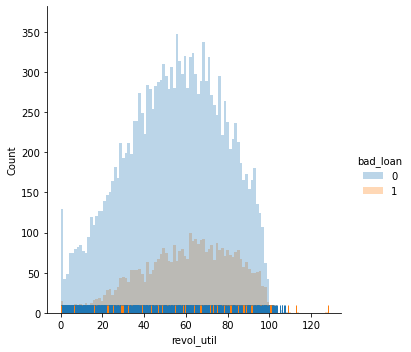

In [55]:
sns.displot(data=data, x='revol_util', bins=100, hue='bad_loan', rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

Without the outliers the destribution of 'revol_util' seems almost normal

Lets observe the other feature with potential outliers

In [56]:
data['annual_inc_log'] = np.log(data['annual_inc'])

In [57]:
#data.head()

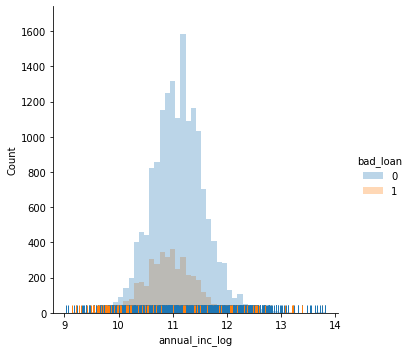

In [58]:
sns.displot(data=data, x="annual_inc_log", bins=50, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

In [59]:
data['total_rec_late_fee_squareroot'] = data['total_rec_late_fee']**(1/2)

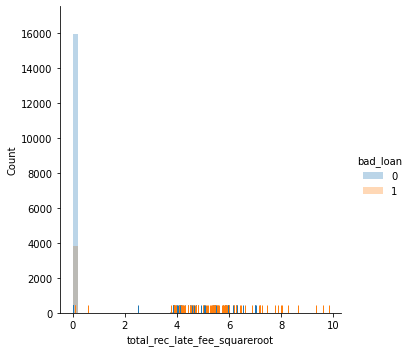

In [60]:
sns.displot(data=data, x="total_rec_late_fee_squareroot", bins=50, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

# Answer:

The feature 'revol_util' clearly displays an outlier.

For the other two features even in more conservative estimation (3 standart deviation from the mean) around 12% of the observation would be considered outliers and thus removed or altered. Two scenarios need to be considered:
1- keep all observation and build a more global model or;
2- separate the observation and build two models, onde for the general data and other for the more extreme observations.

However, to access if those observation were trully outliers we can either transform into logarithms or transform using the square/cubic root.

The logarithm transformation of the 'annual_inc' feature showed that the potential outliers are just extreme observation and that the feature follows a normal destribution, therefore it is recommended to keep the observations.

The logarithm of the 'total_rec_late_fee' is not possible due to a high amount of zeros so we can transform with the square/cubic-root but wihout improvements. The destribution plot of the transformed feature showed a mainly amount of class default (bad_loans) as "outliers". Because we're facing a binary classification of a minority class and these outliers are  belong mainly to the minority class we decided to keep the observations.

# EXERCISE 6

# 6. 
Deal with the **missing values**, along with anomalies. Detect and transform or eliminate them. Remember: not all missing values are represented by a `np.nan`.

In [61]:
data.isnull().sum()

id                                   0
grade                                0
annual_inc                           0
short_emp                            0
emp_length_num                       0
home_ownership                    1491
dti                                154
purpose                              0
term                                 0
last_delinq_none                     0
last_major_derog_none            19426
revol_util                           0
total_rec_late_fee                   0
od_ratio                             0
bad_loan                             0
annual_inc_log                       0
total_rec_late_fee_squareroot        0
dtype: int64

* 'last_major_derog_none'

In [62]:
data['last_major_derog_none']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
19995   NaN
19996   NaN
19997   NaN
19998   NaN
19999   NaN
Name: last_major_derog_none, Length: 20000, dtype: float64

'last_major_derog_none' shows 19426 null observation. If we read the documentation we can see that this feature have 1 if the client has at least 90 days of bad ratings with no more information supplied. So it is possible that the data is imcomplete or if the client does not have more than 90 of bad rating the field is left empty and thus displaying null values.

Therefore we can: 1) remove the feature or 2) replace the null values with 0 since we can interpret the lack of information as the client never had more than 90 of bad ratings.

For the exercice we are gonna assume the 2)

In [63]:
data['last_major_derog_none'] = data['last_major_derog_none'].replace(np.NaN, 0)

In [64]:
#data.isnull().sum()

* 'dti'

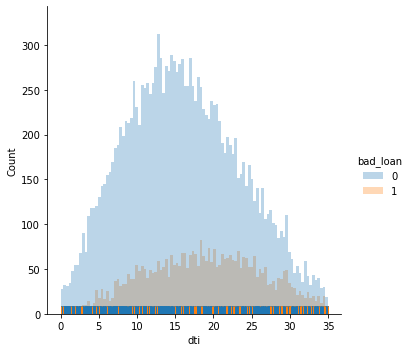

In [65]:
sns.displot(data=data, x="dti", bins=100, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

In [66]:
print(data['dti'].median())
print(data['dti'].mean())

16.19
16.58784137861534


We can observe that the mean and median are very close

But if we group the 'dti' by 'grade' and 'purpose'?

In [67]:
data.groupby(['grade', 'purpose'])['dti'].median()

grade  purpose           
A      car                   10.860
       credit_card           14.140
       debt_consolidation    14.490
       home_improvement       9.470
       house                  8.310
                              ...  
G      medical               12.880
       moving                28.780
       other                 16.010
       small_business        14.380
       wedding               24.595
Name: dti, Length: 80, dtype: float64

We can observe that the median values are very different according with the groupby. So we are goin to use the median of these groupby to impute the missing values.

In [68]:
data['dti'] = data.groupby(['grade','purpose'], sort=False)['dti'].apply(lambda x: x.fillna(x.median()))

In [69]:
data['dti'].isnull().sum()

0

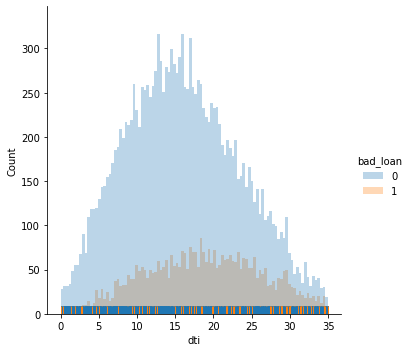

In [70]:
sns.displot(data=data, x="dti", bins=100, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

In [71]:
print(data['dti'].median())
print(data['dti'].mean())

16.19
16.584883249999997


by using this groupby we did not alter the mean, median or the destribution.

* 'home_ownership'

In [72]:
data['home_ownership'].isnull().sum()

1491

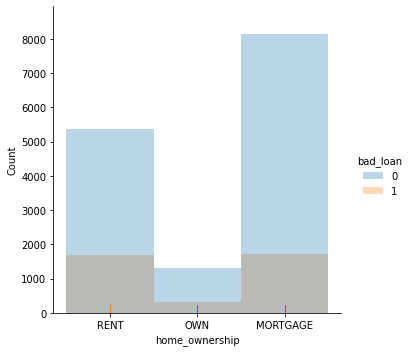

In [73]:
sns.displot(data=data, x="home_ownership", bins=50, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

In [74]:
data.groupby('home_ownership')['bad_loan'].value_counts()

home_ownership  bad_loan
MORTGAGE        0           8136
                1           1708
OWN             0           1297
                1            316
RENT            0           5368
                1           1684
Name: bad_loan, dtype: int64

In [75]:
data['home_ownership'].mode()

0    MORTGAGE
dtype: object

We could replace the 1491 missing values with the mode, MORTGAGE, however this could potentialy create a bias in the data. So let's use the groupby method again

In [76]:
data.groupby(['grade', 'purpose'])['home_ownership'].value_counts()

grade  purpose         home_ownership
A      car             MORTGAGE           15
                       RENT               12
                       OWN                 7
       credit_card     MORTGAGE          368
                       RENT              148
                                        ... 
G      small_business  MORTGAGE           10
                       RENT                6
                       OWN                 2
       wedding         OWN                 1
                       RENT                1
Name: home_ownership, Length: 218, dtype: int64

We can see that the values counts of the groupby are very different so lets impute the missing values with the mode of the groupby

In [77]:
data['home_ownership'] = data.groupby(['grade','purpose'], sort=False)['home_ownership'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [78]:
data['home_ownership'].isnull().sum()

0

In [79]:
data.groupby('home_ownership')['bad_loan'].value_counts()

home_ownership  bad_loan
MORTGAGE        0           9229
                1           1939
OWN             0           1297
                1            316
RENT            0           5474
                1           1745
Name: bad_loan, dtype: int64

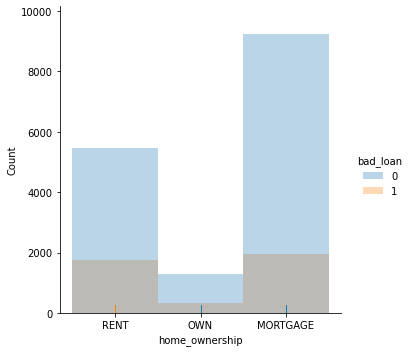

In [80]:
sns.displot(data=data, x="home_ownership", bins=50, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

By using the groupby method only 1000 observation were added to MORTGAGE, potentialy reducing the bias

* 'term'

Other anormaly was detected in the feature 'term' where a possible mistake was made in the 36 monts or Months. For consistency we are chaing to lower case

In [81]:
data['term'] = data['term'].str.lower()

In [82]:
data['term'].value_counts()

 36 months    15001
 60 months     4999
Name: term, dtype: int64

* 'revol_util'

The outliers detected in this feature was dealt with in exercise 5

# EXERCISE 7

# 7.1. 
Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical)

Two tecnhiques are used to discard numeric features: 1) Variance threshold and 2) Pearson correlation with target feature

Lets take a look at both methods

We need to separate the numeric features first

In [83]:
data_numeric = data.select_dtypes(include='number')

In [84]:
data_numeric.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,annual_inc_log,total_rec_late_fee_squareroot
0,11454641,100000.0,1,1,26.27,1,0.0,43.2,0.0,0.160624,0,11.512925,0.0
1,9604874,83000.0,0,4,5.39,0,0.0,21.5,0.0,0.810777,0,11.326596,0.0
2,9684700,78000.0,0,11,18.45,1,0.0,46.3,0.0,0.035147,1,11.264464,0.0
3,9695736,37536.0,0,6,12.28,0,0.0,10.7,0.0,0.534887,1,10.533056,0.0
4,9795013,65000.0,0,11,11.26,0,0.0,15.2,0.0,0.166500,0,11.082143,0.0


In [85]:
data_numeric.shape

(20000, 13)

* variance threshold method for a variance of 5% 

In [86]:
variance_threshold = VarianceThreshold(0.05)
variance_threshold

VarianceThreshold(threshold=0.05)

In [87]:
variance_threshold.fit_transform(data_numeric).shape

(20000, 12)

In [88]:
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [89]:
new_columns = data_numeric.columns[variance_threshold.get_support()]

# Create a dataframe
data_numeric_t = pd.DataFrame(data_numeric, columns=new_columns)
data_numeric_t.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,annual_inc_log,total_rec_late_fee_squareroot
0,11454641,100000.0,1,1,26.27,1,43.2,0.0,0.160624,0,11.512925,0.0
1,9604874,83000.0,0,4,5.39,0,21.5,0.0,0.810777,0,11.326596,0.0
2,9684700,78000.0,0,11,18.45,1,46.3,0.0,0.035147,1,11.264464,0.0
3,9695736,37536.0,0,6,12.28,0,10.7,0.0,0.534887,1,10.533056,0.0
4,9795013,65000.0,0,11,11.26,0,15.2,0.0,0.166500,0,11.082143,0.0


It seems this methods excludes only one feature with less than 5% variance - last_major_derog_none

* with the pearson correlation method

In [90]:
from scipy import stats

for col in data_numeric.columns:
    corr, pval = stats.pearsonr(data_numeric[col], data_numeric.bad_loan)
    print(f"{col}: corr={corr: >6.3f}  pval={pval:.3f}  pass the test={pval<0.05}")

id: corr=-0.037  pval=0.000  pass the test=True
annual_inc: corr=-0.092  pval=0.000  pass the test=True
short_emp: corr= 0.037  pval=0.000  pass the test=True
emp_length_num: corr=-0.041  pval=0.000  pass the test=True
dti: corr= 0.142  pval=0.000  pass the test=True
last_delinq_none: corr= 0.021  pval=0.002  pass the test=True
last_major_derog_none: corr=-0.001  pval=0.885  pass the test=False
revol_util: corr= 0.102  pval=0.000  pass the test=True
total_rec_late_fee: corr= 0.130  pval=0.000  pass the test=True
od_ratio: corr= 0.000  pval=0.954  pass the test=False
bad_loan: corr= 1.000  pval=0.000  pass the test=True
annual_inc_log: corr=-0.128  pval=0.000  pass the test=True
total_rec_late_fee_squareroot: corr= 0.140  pval=0.000  pass the test=True


This method shows two features last_major_derog_none (again) and od_ratio

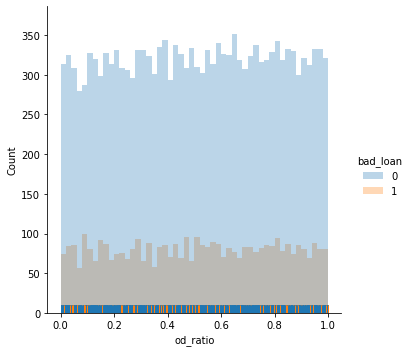

In [91]:
sns.displot(data=data, x="od_ratio", bins=50, hue="bad_loan", rug=True, kde=False, lw=0, alpha=0.3)
plt.show()

In [92]:
#sns.pairplot(data_numeric, hue="bad_loan")

# Answer

Despite these methods having their shortcomings, the last_major_derog_none was a feature that displayed 19426 nulls, which were replaced by 0. Other hypothesis to deal with this feature was to remove it and these feature selections seem to point in that direction.

Regarding the od_ratio, this feature seems to be uniformly destributed and a pairplot seem to support this observation. In addition it seems the pearson correlation p value is higher than 0.05 so we can discard these two feature

* Important
OTHER TWO FEATURES THAT NEED TO BE DISCARDED ARE id, a unique identifier of the loan AND THE TARGET FEATURE - bad_loan (for trainning and testing the models)

In [93]:
data = data.drop(['id', 'bad_loan', 'last_major_derog_none', 'od_ratio'], axis=1)

In [94]:
data.shape

(20000, 13)

In [95]:
data.isnull().sum()

grade                            0
annual_inc                       0
short_emp                        0
emp_length_num                   0
home_ownership                   0
dti                              0
purpose                          0
term                             0
last_delinq_none                 0
revol_util                       0
total_rec_late_fee               0
annual_inc_log                   0
total_rec_late_fee_squareroot    0
dtype: int64

In [96]:
data.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,annual_inc_log,total_rec_late_fee_squareroot
0,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,11.512925,0.0
1,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,11.326596,0.0
2,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,11.264464,0.0
3,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,10.533056,0.0
4,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,11.082143,0.0


# EXERCISE 8

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

   8.1. Create a pipeline with three steps: 1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; 2) One Scaler you may know; 3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
   8.2. Fit and Transform your dataset.  
   8.3. Comment what you obtained.  

In [97]:
# Loading the dataset again

data_ex8 = pd.read_csv('final_project_lending.csv', low_memory=False)

In [98]:
# Selecting only numeric features

data_ex8 = data_ex8.select_dtypes(include='number')

In [99]:
data_ex8.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,100000.0,1,1,26.27,1,NaN,43.2,0.0,0.160624,0
1,9604874,83000.0,0,4,5.39,0,NaN,21.5,0.0,0.810777,0
2,9684700,78000.0,0,11,18.45,1,NaN,46.3,0.0,0.035147,1
3,9695736,37536.0,0,6,12.28,0,NaN,10.7,0.0,0.534887,1
4,9795013,65000.0,0,11,11.26,0,NaN,15.2,0.0,0.166500,0


In [100]:
data_ex8.isnull().sum()

id                           0
annual_inc                   0
short_emp                    0
emp_length_num               0
dti                        154
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [101]:
# Lets drop the feature last_major_derog_none, id and save the target (we're gonna keep the od_ratio feature for fearing of losing too many features for the exercise)
data_ex8_y = pd.Series(data_ex8['bad_loan'], name='bad_loan')

data_ex8 = data_ex8.drop(['last_major_derog_none', 'id', 'bad_loan'], axis=1)

In [102]:
data_ex8

,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio
0,100000.0,1,1,26.27,1,43.2,0.0,0.160624
1,83000.0,0,4,5.39,0,21.5,0.0,0.810777
2,78000.0,0,11,18.45,1,46.3,0.0,0.035147
3,37536.0,0,6,12.28,0,10.7,0.0,0.534887
4,65000.0,0,11,11.26,0,15.2,0.0,0.166500
...,...,...,...,...,...,...,...,...
19995,27000.0,0,9,18.36,1,46.5,0.0,0.821782
19996,45000.0,0,2,23.22,0,46.2,0.0,0.652200
19997,104000.0,0,5,13.27,1,78.5,0.0,0.482555
19998,38400.0,0,2,12.84,0,47.4,0.0,0.822980


In [103]:
data_ex8_y

0        0
1        0
2        1
3        1
4        0
        ..
19995    1
19996    0
19997    0
19998    0
19999    0
Name: bad_loan, Length: 20000, dtype: int64

# 8.1. 
Create a pipeline with three steps: 1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; 2) One Scaler you may know; 3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  

In [104]:
pipeline = Pipeline([
    ('step_1', SimpleImputer(strategy='median')),
    ('step_2', MinMaxScaler()),
    ('step_3', PCA(n_components=5)),
])

# 8.2. 
Fit and Transform your dataset.

In [105]:
data_ex8_transformed = pipeline.fit_transform(data_ex8, data_ex8_y)

data_ex8_transformed = pd.DataFrame(data_ex8_transformed)

In [106]:
pipeline.named_steps['step_3'].explained_variance_ratio_.cumsum()

array([0.41678237, 0.70319661, 0.84166469, 0.92004853, 0.9949351 ])

In [107]:
data_ex8_transformed

,0,1,2,3,4
0,-0.578624,0.914855,0.334424,0.358805,-0.231217
1,0.529140,0.189415,-0.304102,-0.375808,0.154754
2,-0.402412,-0.413368,0.471234,0.096167,-0.146847
3,0.544270,0.054748,-0.028898,-0.148680,0.100775
4,0.592233,-0.282391,0.342865,-0.087714,-0.191947
...,...,...,...,...,...
19995,-0.420337,-0.282312,-0.316739,0.054642,-0.036224
19996,0.501218,0.323388,-0.151593,0.078738,0.420555
19997,-0.456561,-0.008348,0.021588,-0.154407,0.149376
19998,0.506199,0.324269,-0.319590,-0.205425,0.332418


In [108]:
data_ex8_transformed.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

# Answer 
From 8 numeric variables, the data_ex8, which included some features with nulls, we ended up with a dataset with no nulls and only 5 features, that are based on the original features
but now, we lost the explicability of the dataset. Nevertheless this might be important with having less features and therefore less resources being aloted to compute the model than explicability
these 5 features still manages to explain 99.5% of the variance of the original dataset, therefore, in this case we transform eight features into five with minimal loss of information.

# EXERCISE 9

Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.

In [109]:
data_ex9 = pd.read_csv('final_project_lending.csv', low_memory=False)


In [110]:
data_ex9_y = pd.DataFrame(data_ex9['bad_loan'])

In [111]:
#data_ex9_y

In [112]:
data_ex9 = data_ex9.drop(['last_major_derog_none', 'id', 'od_ratio', 'bad_loan'], axis=1)

In [113]:
data_ex9.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee
0,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0
1,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0
2,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0
3,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0
4,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0


In [114]:
data_ex9.dtypes

grade                  object
annual_inc            float64
short_emp               int64
emp_length_num          int64
home_ownership         object
dti                   float64
purpose                object
term                   object
last_delinq_none        int64
revol_util            float64
total_rec_late_fee    float64
dtype: object

In [115]:
data_ex9.isnull().sum()

grade                    0
annual_inc               0
short_emp                0
emp_length_num           0
home_ownership        1491
dti                    154
purpose                  0
term                     0
last_delinq_none         0
revol_util               0
total_rec_late_fee       0
dtype: int64

In [116]:
class onlynumericaldata(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Numerical features to pass down the numerical pipeline
        X = X.select_dtypes(include='number')
        
        return X.values

In [117]:
class onlycategoricaldata(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Numerical features to pass down the numerical pipeline
        X = X = X.select_dtypes(exclude='number')
        
        return X.values

In [118]:
# This Transformer was produced during class
class DropColumns(TransformerMixin):
    def __init__(self, na_threshold=0.1):

        self.na_threshold = na_threshold
    
    def fit(self, X, y=None):
        na_ratio = X.isnull().mean()
        self.columns_to_drop = X.columns[na_ratio > self.na_threshold].tolist()
        return self
    
    def transform(self, X):
        return X.drop(columns=self.columns_to_drop)

In [119]:
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df):
        return self.func(input_df)

    def fit(self, X, y=None):
        return self
    
def change_lower_case (df):
    df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x) 
    return df
def change_upper_case (df):
    df = df.apply(lambda x: x.str.upper() if x.dtype == 'object' else x) 
    return df

In [120]:
# The function used in this Transformer was produced during class
class OutlierIdentifier(BaseEstimator,TransformerMixin):
    def __init__(self, n_std = 3): # n_std will define the lower and upper bound
        self.n_std = n_std
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        mean = X.mean()
        std = X.std()
        #set to np.nan values outside the lower and upper bound
        X.loc[((X < mean - self.n_std * std) | (X > mean + self.n_std * std))] = np.nan
        return pd.Series(X)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X)
        return X.apply(self.outlier_detector)

In [121]:
numeric_pipeline = Pipeline([
                            ('step_1', onlynumericaldata()),
                            ('step_2', OutlierIdentifier(n_std = 5)),
                            ('step_3', SimpleImputer(strategy='median')),
                            ('step_4', MinMaxScaler())
                            
])

In [122]:
data_ex9_numeric = numeric_pipeline.fit_transform(data_ex9)

In [123]:
data_ex9_numeric

array([[0.31958072, 1.        , 0.09090909, ..., 1.        , 0.33723653,
        0.        ],
       [0.26026212, 0.        , 0.36363636, ..., 0.        , 0.16783763,
        0.        ],
       [0.24281547, 0.        , 1.        , ..., 1.        , 0.36143638,
        0.        ],
       ...,
       [0.33353804, 0.        , 0.45454545, ..., 1.        , 0.6128025 ,
        0.        ],
       [0.10463802, 0.        , 0.18181818, ..., 0.        , 0.37002342,
        0.        ],
       [0.4940472 , 0.        , 1.        , ..., 0.        , 0.31772053,
        0.        ]])

In [124]:
data_ex9_numeric = pd.DataFrame(data_ex9_numeric)

In [125]:
data_ex9_numeric.head()

,0,1,2,3,4,5,6
0,0.319581,1.0,0.090909,0.750786,1.0,0.337237,0.0
1,0.260262,0.0,0.363636,0.154044,0.0,0.167838,0.0
2,0.242815,0.0,1.000000,0.527294,1.0,0.361436,0.0
3,0.101623,0.0,0.545455,0.350957,0.0,0.083528,0.0
4,0.197454,0.0,1.000000,0.321806,0.0,0.118657,0.0


In [126]:
categoric_pipeline = Pipeline([
                            ('step_2', DataframeFunctionTransformer(change_upper_case)),
                            ('step_1', onlycategoricaldata()),
                            ('step_3', SimpleImputer(strategy='most_frequent')),
                            ('setp_4', OrdinalEncoder()),
                            ('step_5', MinMaxScaler())
])

In [127]:
data_ex9_categoric = categoric_pipeline.fit_transform(data_ex9)

In [128]:
data_ex9_categoric = pd.DataFrame(data_ex9_categoric)

In [129]:
data_ex9_categoric.head()

,0,1,2,3
0,0.0,1.0,0.090909,0.0
1,0.0,0.5,0.090909,0.0
2,0.5,0.0,0.181818,1.0
3,0.5,0.0,0.545455,1.0
4,0.5,0.0,0.181818,0.0


In [130]:
data_ex9_total = pd.concat([data_ex9_categoric, data_ex9_numeric], axis=1, ignore_index = True)

In [131]:
#data_ex9_total

In [132]:
data_ex9_total.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [133]:
reducing_features = Pipeline([
    ('PCA', PCA(n_components=6)),
])

In [134]:
data_ex9_reduced = reducing_features.fit_transform(data_ex9_total)

In [135]:
data_ex9_reduced = pd.DataFrame(data_ex9_reduced)

In [136]:
data_ex9_reduced.head()

,0,1,2,3,4,5
0,1.000235,0.471569,-0.025041,0.605504,-0.096948,-0.412969
1,-0.268345,0.558450,-0.252850,0.052485,0.477491,0.157122
2,-0.110347,-0.927244,0.447830,-0.088600,0.035360,-0.150071
3,-0.777823,-0.194682,0.513073,0.282956,0.308722,0.188472
4,-0.690589,0.081864,-0.341934,-0.170739,0.120996,-0.103800


In [137]:
data_ex9_reduced.shape

(20000, 6)

After three pipelines and three very simples custom transformers, plus some other sklearn transformers we achieved a final dataset, normalized, without potential outliers, and 20000 observation and 6 feature. Because the last pipeline is a one step transformer, PCA, is impossible to relate the features of the final dataset with the original features. 

We knew from previous exercices that only one feature, revol_util, actualy had outliers´, however for the sake of the exercice and using a custom transformer we used the outliers detector transformer, but to offset the impact of this transformer we used a very conservative lower and upper bound of 5 times the standart deviation. 

In [138]:
# Going a bit further

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


seed = 42

In [140]:
data_ex9_y.groupby('bad_loan')['bad_loan'].count()

bad_loan
0    16000
1     4000
Name: bad_loan, dtype: int64

In [141]:
# A simple Baseline

16000/(16000+4000)

0.8

In [142]:
data_ex9_to_model = pd.concat([data_ex9_reduced, data_ex9_y], axis=1, ignore_index = True)

In [143]:
data_ex9_to_model.head()

,0,1,2,3,4,5,6
0,1.000235,0.471569,-0.025041,0.605504,-0.096948,-0.412969,0
1,-0.268345,0.558450,-0.252850,0.052485,0.477491,0.157122,0
2,-0.110347,-0.927244,0.447830,-0.088600,0.035360,-0.150071,1
3,-0.777823,-0.194682,0.513073,0.282956,0.308722,0.188472,1
4,-0.690589,0.081864,-0.341934,-0.170739,0.120996,-0.103800,0


In [144]:
train_set, test_set = train_test_split(data_ex9_to_model, test_size = 0.2, random_state = seed)

X_train = train_set.drop([6], axis = 1)
y_train = train_set[6]

X_test = test_set.drop([6], axis = 1)
y_test = test_set[6]


In [145]:
# Logistic regression

lr = LogisticRegression(random_state = seed, max_iter = 500).fit(X_train, y_train)

In [146]:
y_preds = lr.predict(X_test)

In [147]:
# Accuracy in test data

accuracy_score(y_test, y_preds)

0.80325

In [148]:
lr = LogisticRegression(random_state = seed, max_iter = 500)

parameters = {'C': [0.01, 0.1, 1, 10, 100]}

In [149]:
clf = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

In [150]:
clf.best_estimator_

LogisticRegression(C=0.1, max_iter=500, random_state=42)

In [151]:
# Accuracy on train data

clf.best_score_

0.8008749999999999

In [152]:
# knn

knn = KNeighborsClassifier(n_neighbors = 20).fit(X_train, y_train)

In [153]:
y_preds = knn.predict(X_test)

In [154]:
accuracy_score(y_test, y_preds)

0.7995

In [155]:
for k in range(40, 60, 5):

  knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

  accuracy = knn.score(X_test, y_test)

  print('Accuracy for k = ', k , 'is: ', accuracy)

Accuracy for k =  40 is:  0.80475
Accuracy for k =  45 is:  0.80325
Accuracy for k =  50 is:  0.80225
Accuracy for k =  55 is:  0.804


In [156]:
parameters = {'n_neighbors': range(30, 40, 1)}

In [157]:
knn = KNeighborsClassifier()

In [158]:
clf = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

In [159]:
# Accuracy train

clf.best_score_

0.7994375

In [160]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=35)

In [161]:
y_preds = clf.predict(X_test)

In [162]:
# Accuracy test

accuracy_score(y_test, y_preds)

0.80275

In [163]:
# Random forest

rf = RandomForestClassifier(random_state = seed).fit(X_train, y_train)

In [164]:
y_preds = rf.predict(X_test)

In [165]:
# Accuracy train

accuracy_score(y_test, y_preds)

0.783

In [166]:
clf_tree = RandomForestClassifier(random_state = seed)

In [167]:
parameters = {'n_estimators': [10, 100, 300], 'min_samples_split': [10, 50]}

In [168]:
clf = GridSearchCV(clf_tree, parameters, cv = 5).fit(X_train, y_train)

In [169]:
y_preds = clf.predict(X_test)

In [170]:
# Accuracy test

accuracy_score(y_test, y_preds)

0.8

In [171]:
clf.best_params_

{'min_samples_split': 50, 'n_estimators': 100}

The baseline for this inbalanced data is 0.8.

We've tried some models suitable for supervised classification problems, and the results were underperforming.

Even with with the best performing model with the best performing parameters the results were not above 0.8 which means we failed to extract impactfully information.

There are however several things that could be tested. Trying feature selection, with the most importante features, therefore trying to reduce noisy data.
We could try diferent scalers, we used MinMax but could have tried StandardScaler, We could also have tried One Hot Encoding or Binary encoding (reducing data, at the cost of information) instead of OrdinalEncoding. We could have tried binning (and even smoothing the bins). And could try to feature engineering, with more knowlegde regarding the banking system.

Lastly we could try more paramenters in the models used, or use other models (like SVM, which takes a while to train).


